# Diabetes Classification

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# The Data
We have 8 columns which contain data related to  various factors relating to diabetes.  
The outcome columns shows whether the person has diabetes or not.   
All the columns are numerical.

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Initital findings:
- There are missing values in 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' columns
- There are outliers in Glucose, BloodPressure, BMI, and DiabetesPedigreeFunction

In [5]:
col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for i in col:
    df[i] = df[i].apply(lambda x: np.NaN if x==0 else x)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [6]:
print('Missing Values')
df.isna().sum()

Missing Values


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## Handling Missing Values
Since `Insulin` and `SkinThickness` have too many missing values, these columns are dropped. 

In [7]:
df.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1


In [8]:
df.isna().sum()


Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.289230,-0.002805,0.330107,0.170589
BMI,0.021719,0.232771,0.289230,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

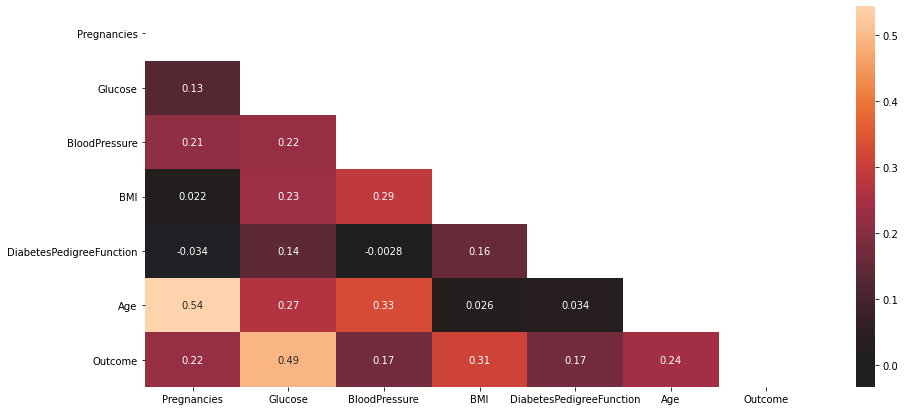

In [10]:
sns.set_palette('magma')
x = np.triu(df.corr())
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), mask = x, annot=True, center=0)

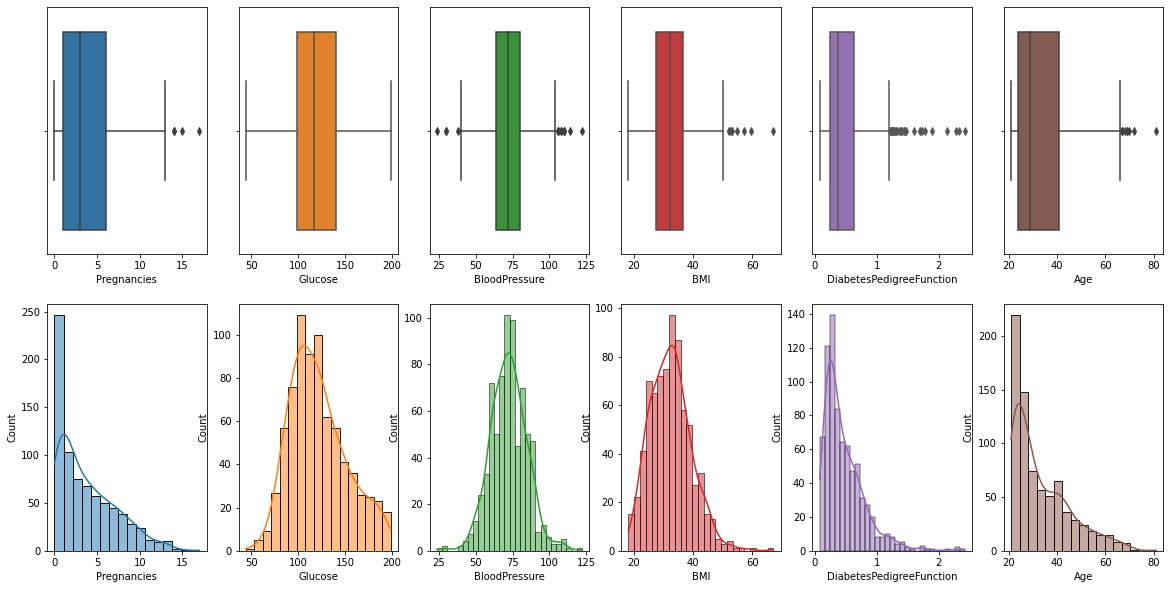

In [13]:
colors = sns.color_palette('tab10')
cols = list(df.columns)
cols.remove('Outcome')
fig, axs = plt.subplots(nrows=2, ncols=len(cols),figsize=(20, 10))
for i,col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax = axs[0,i], color=colors[i])
    sns.histplot(data=df, x=col, ax=axs[1,i], multiple='dodge', color=colors[i], kde=True)


## Handling Outliers
columns `Pregnancies`, `BloodPressure`, `BMI` and `DiabetesPedigreeFunction` have outliers.  
Values of ouliers are capped at appropriate values accordingly.

In [14]:
uv = df['Pregnancies'].quantile(0.99)
df.drop(df[df.Pregnancies>uv].index, axis=0, inplace=True)

In [15]:
uv = df.BloodPressure.quantile(0.99)
lv = df.BloodPressure.quantile(0.01)
df['BloodPressure'][df.BloodPressure>uv] = uv
df['BloodPressure'][df.BloodPressure < lv] = lv
uv, lv


(106.0, 44.0)

In [16]:
uv = df.BMI.quantile(0.99)
df.BMI[df.BMI>uv] = uv
uv


51.10400000000004

In [17]:
uv = df.DiabetesPedigreeFunction.quantile(0.96)
df.DiabetesPedigreeFunction[df.DiabetesPedigreeFunction > uv] = uv


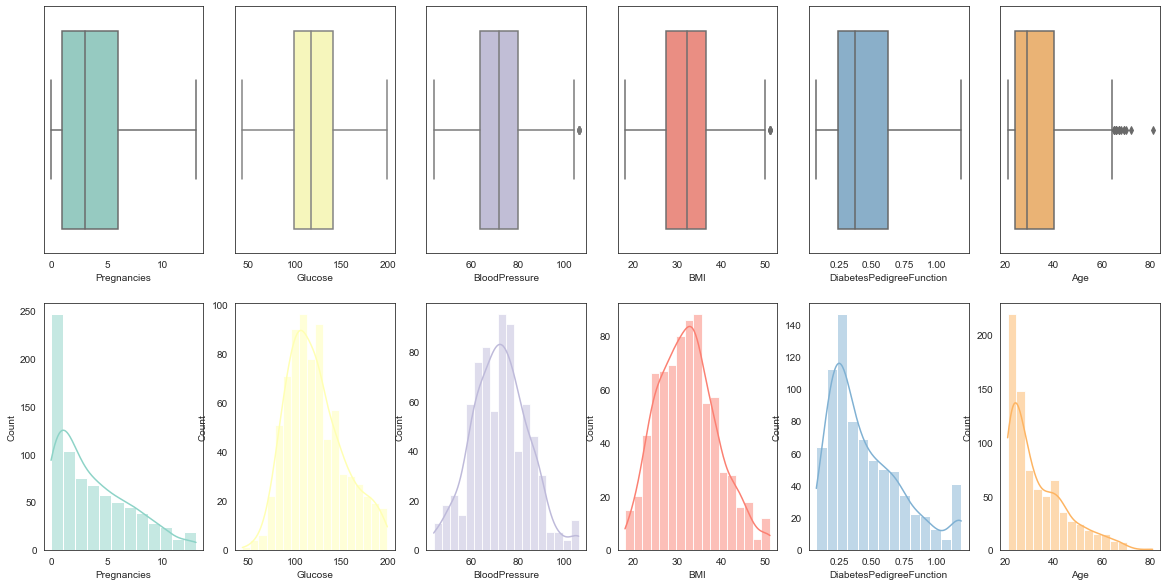

In [18]:
colors = sns.color_palette('Set3')
sns.set_style('white')
cols = list(df.columns)
cols.remove('Outcome')

fig, axs = plt.subplots(nrows=2, ncols=len(cols), figsize=(20, 10))
for i, col in enumerate(cols):
    sns.boxplot(data=df, x=col, ax=axs[0, i], color=colors[i])
    sns.histplot(data=df, x=col, ax=axs[1, i], color=colors[i], kde=True)


## Factors related to diabetes

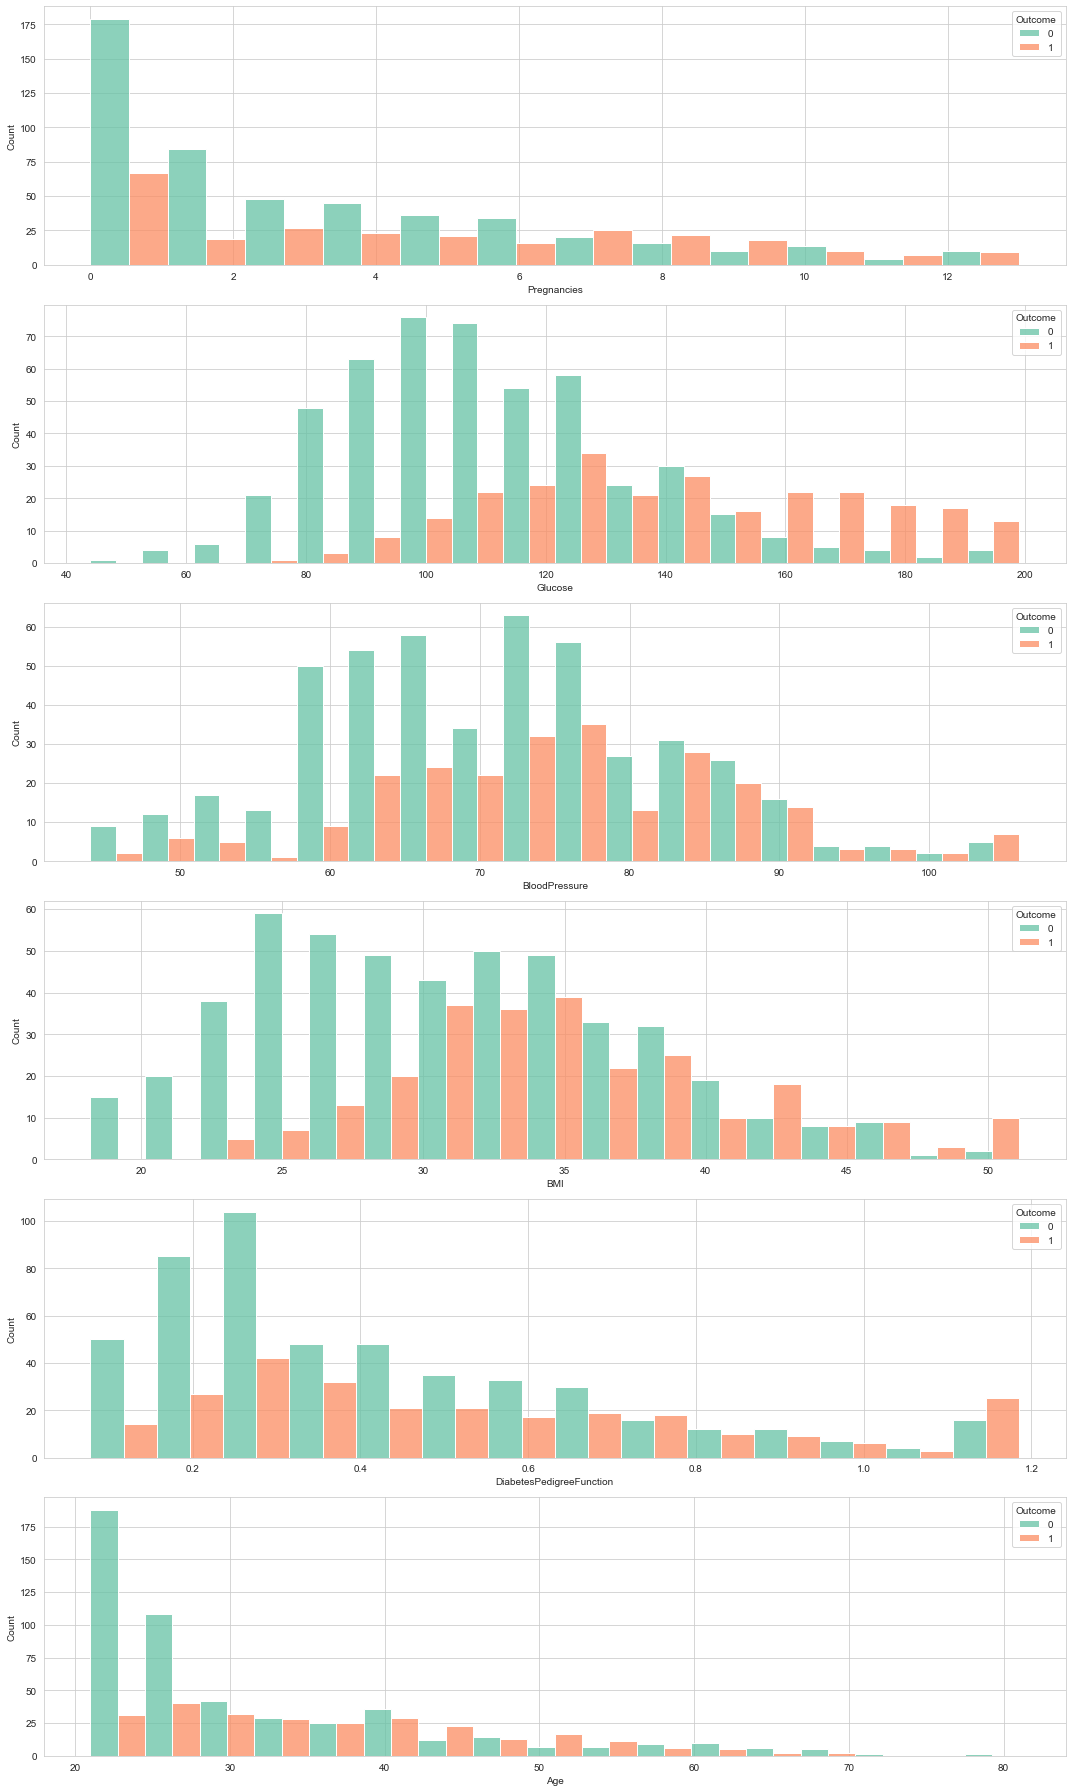

In [19]:
sns.set_palette('Set2')
sns.set_style('whitegrid')
fig, axs = plt.subplots(nrows=6, figsize=(15, 25))
for i, col in enumerate(cols):
    sns.histplot(data=df, x=col, hue='Outcome', ax=axs[i], multiple='dodge')
fig.tight_layout()


In [20]:
sns.set_palette('Set3')
sns.set_style('dark')
sns.pairplot(df, hue = 'Outcome')

# Imputation

In [23]:
cols = ['BMI', 'Glucose', 'BloodPressure']
for i in cols:
    df.fillna(df[i].median(), inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               764 non-null    int64  
 1   Glucose                   764 non-null    float64
 2   BloodPressure             764 non-null    float64
 3   BMI                       764 non-null    float64
 4   DiabetesPedigreeFunction  764 non-null    float64
 5   Age                       764 non-null    int64  
 6   Outcome                   764 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 47.8 KB


# Model selection

In [25]:
from sklearn.model_selection import train_test_split
cols = list(df.columns)
cols.remove('Outcome')
X = df[cols]
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [26]:
X.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,3.786649,120.986911,70.596859,32.376482,0.458663,33.187173
std,3.278714,31.246474,14.433752,6.698269,0.284227,11.764745
min,0.000000,32.200000,32.200000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,27.500000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,32.200000,0.372500,29.000000
75%,6.000000,140.000000,80.000000,36.500000,0.626250,40.250000
max,13.000000,199.000000,106.000000,51.104000,1.185360,81.000000


In [27]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
cols = X.columns
X = stdsc.fit_transform(X)
X = pd.DataFrame(X, columns = list(cols))
X.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.675509,0.865083,0.097276,0.182782,0.592652,1.430022
1,-0.850478,-1.152466,-0.318688,-0.862949,-0.379039,-0.186031
2,1.285904,1.985943,-0.457343,-1.355937,0.751080,-0.100975
3,-0.850478,-1.024367,-0.318688,-0.638864,-1.026833,-1.036585
4,-1.155676,0.512812,-1.843892,1.601987,2.558425,-0.015920


In [28]:
X.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
count,7.640000e+02,7.640000e+02,7.640000e+02,7.640000e+02,7.640000e+02,7.640000e+02
mean,1.860060e-17,-1.069534e-16,-1.162537e-18,3.696868e-16,1.162537e-17,-1.209039e-16
std,1.000655e+00,1.000655e+00,1.000655e+00,1.000655e+00,1.000655e+00,1.000655e+00
min,-1.155676e+00,-2.843363e+00,-2.661956e+00,-2.117826e+00,-1.340168e+00,-1.036585e+00
25%,-8.504782e-01,-7.041215e-01,-5.959982e-01,-7.284981e-01,-7.557450e-01,-7.814187e-01
50%,-2.400833e-01,-1.276791e-01,9.727620e-02,-2.636462e-02,-3.033454e-01,-3.561417e-01
75%,6.755090e-01,6.088861e-01,6.518957e-01,6.160128e-01,5.900118e-01,6.007316e-01
max,2.811891e+00,2.498336e+00,2.454409e+00,2.797706e+00,2.558425e+00,4.066739e+00


In [29]:
sns.set_style('white')
sns.set_palette('tab10')
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
def model_accuracy(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print('accuracy_score = ', accuracy_score(y_test, pred))
    print(classification_report(y_test,pred))
    print('confusion_matrix:\n ' , confusion_matrix(y_test, pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred), display_labels=['No', 'Yes'])
    disp.plot()
    


## Logistic Regression

accuracy_score =  0.7843137254901961
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       101
           1       0.74      0.56      0.64        52

    accuracy                           0.78       153
   macro avg       0.77      0.73      0.74       153
weighted avg       0.78      0.78      0.78       153

confusion_matrix:
  [[91 10]
 [23 29]]


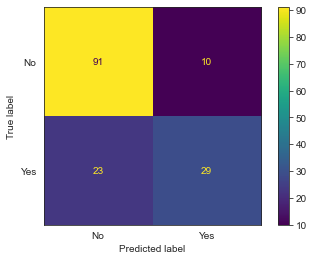

In [30]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=180)
model_accuracy(model1, X_train, X_test, y_train, y_test)


## Random Forest

accuracy_score =  0.8104575163398693
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       101
           1       0.78      0.62      0.69        52

    accuracy                           0.81       153
   macro avg       0.80      0.76      0.78       153
weighted avg       0.81      0.81      0.80       153

confusion_matrix:
  [[92  9]
 [20 32]]


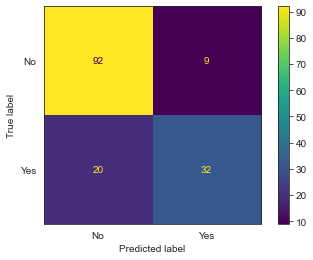

In [31]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=2)
model2.fit(X_train, y_train)
model_accuracy(model2, X_train, X_test, y_train, y_test)


## Gaussian Naive Bayes

accuracy_score =  0.7973856209150327
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       101
           1       0.74      0.62      0.67        52

    accuracy                           0.80       153
   macro avg       0.78      0.75      0.76       153
weighted avg       0.79      0.80      0.79       153

confusion_matrix:
  [[90 11]
 [20 32]]


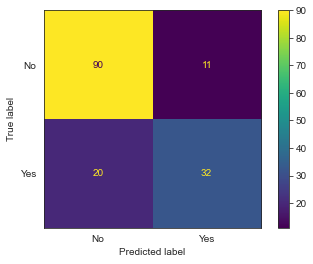

In [32]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train, y_train)
model_accuracy(model3, X_train, X_test, y_train, y_test)


# Conclusion:
Random Forest Model gives best accuracy score.  
Therefore it is used as the final model.  

In [33]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,
0,3.298000,110.173200,69.443600,30.869016,0.419913,31.190000
1,4.712121,141.467424,72.781061,35.231530,0.532052,36.969697


# Model Building and prediction

In [34]:
# def diabetes_prediction(model):
#     preg = int(input('No. of pregnancies: '))
#     glu = int(input('Plasma glucose concentration a 2 hours in an oral glucose tolerance test: '))
#     b_pres = int(input('Diastolic blood pressure (mm Hg): '))
#     bmi = float(input('Body mass index (weight in kg/(height in m)^2): ')) 
#     pedi = float(input('Diabetes Pedigree Function: '))
#     age = int(input('Age: '))
    
#     values = [[preg,glu,b_pres,bmi,pedi, age]]
#     pred = model.predict(values)
#     print('\nPrediction: ')
#     for i in pred:
#         if i==0:
#             print('Not Diabetic')
#         elif i==1:
#             print('Diabetic')
            
# Rand_forest = RandomForestClassifier()
# Rand_forest.fit(X,y)
# diabetes_prediction(Rand_forest)
    


# Exporting the model


In [37]:
import pickle
model = RandomForestClassifier()
model.fit(X,y)
pickle.dump(model, open('model.pkl', 'wb'))
